In [ ]:
'''
RFM & Cohort Analysis
'''

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np

import squarify
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [3]:
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

In [4]:
# преобразование столбца в datetime

orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])

# подготовка перед присоединением
payments = payments.set_index('order_id')
orders = orders.set_index('order_id')

# присоединение к order_id
joined = orders.join(payments) 

In [5]:
joined.isna().sum().sort_values(ascending=False)

order_delivered_customer_date    3132
order_delivered_carrier_date     1888
order_approved_at                 175
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
payments.head()

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
joined.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04


In [ ]:
'''
Есть недостающие значения. И в order_delivered_carrier_date также отсутствуют значения. Поэтому их следует отбросить.
'''

In [9]:
last_date = joined['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

RFM = joined.dropna(subset=['order_delivered_carrier_date']).reset_index().groupby('customer_id')\
            .agg(Recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 Frequency = ('order_id', 'size'),
                 Monetary = ('payment_value', 'sum'))

In [ ]:
'''
Проверка работоспособности: есть или нет ли у нас значения NaN?
'''

In [10]:
RFM.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [11]:
RFM.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Recency,Frequency,Monetary
count,97658.000000,97658.000000,97658.000000
mean,250.511847,1.044451,159.824647
std,152.674579,0.378736,218.553380
min,1.000000,1.000000,0.000000
1%,21.000000,1.000000,22.380000
5%,35.000000,1.000000,32.380000
10%,54.000000,1.000000,39.590000
25%,127.000000,1.000000,61.930000
50%,231.000000,1.000000,105.280000
75%,361.000000,1.000000,176.260000


In [ ]:
'''
Итак, здесь мы видим, что у нас есть некоторые выбросы в частотных и денежных группах. 
Поэтому их следует анализировать отдельно.
'''

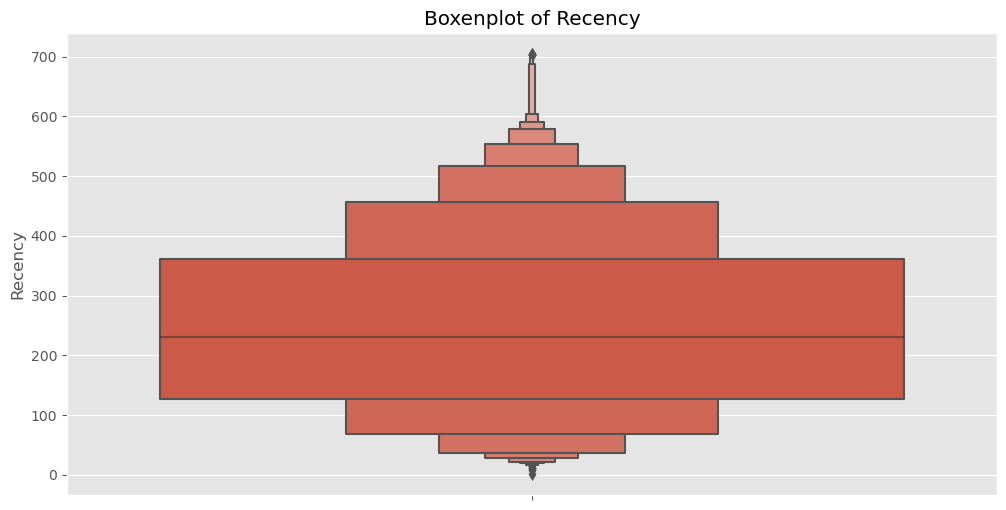

In [12]:
# Recency

plt.figure(figsize=(12, 6))
sns.boxenplot(y='Recency', data=RFM)
plt.title('Boxenplot of Recency');

In [13]:
# Frequency

RFM['Frequency'].value_counts(normalize=True)*100

1     97.025333
2      2.395093
3      0.303099
4      0.108542
5      0.053247
6      0.035839
7      0.028671
8      0.010240
11     0.008192
12     0.008192
9      0.007168
10     0.003072
13     0.003072
19     0.002048
15     0.002048
14     0.002048
21     0.001024
26     0.001024
29     0.001024
22     0.001024
Name: Frequency, dtype: float64

In [ ]:
'''
Предполагаю, здесь нам следует выбирать только значения частоты, превышающие 5, потому что мы удаляем только 0,11% записей.
'''

In [14]:
RFM['Frequency'].apply(lambda x: 'less or equal to 5' if x<=5 else 'greater than 5').value_counts(normalize=True) * 100

less or equal to 5    99.885314
greater than 5         0.114686
Name: Frequency, dtype: float64

In [15]:
RFM = RFM[RFM['Frequency'] <= 5]

In [16]:
# Monetary

RFM['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    97546.000000
mean       159.780566
std        218.510326
min          0.000000
25%         61.880000
50%        105.280000
75%        176.255000
90%        305.680000
95%        446.215000
99%       1048.570000
max      13664.080000
Name: Monetary, dtype: float64

In [ ]:
'''
Здесь следует использовать процентиль 95%, чтобы исключить выбросы.
'''

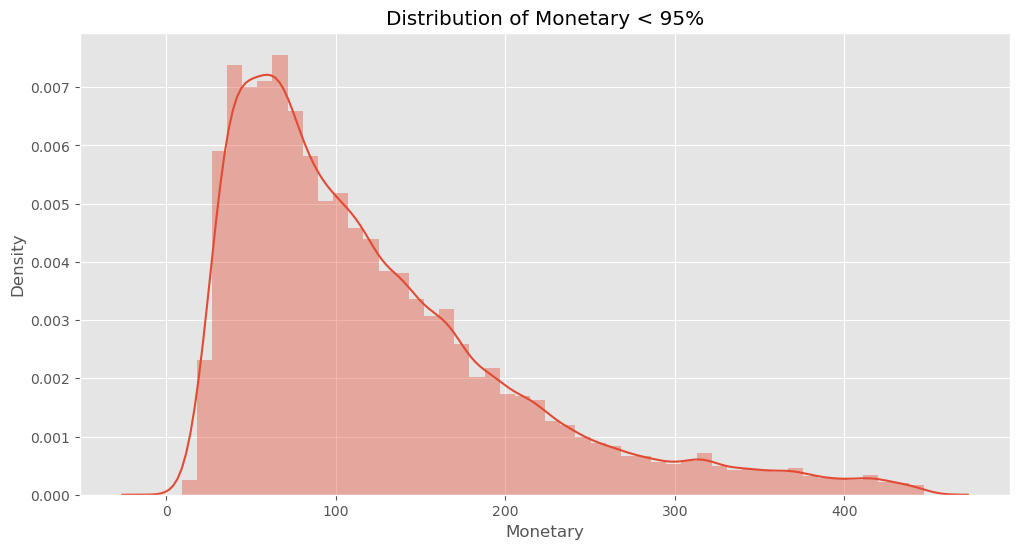

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(RFM[RFM['Monetary']<447].Monetary);

In [18]:
RFM = RFM[RFM['Monetary'] < 447]

In [ ]:
'''
RFM-группы¶
используем квантили для присвоения оценок по новизне и денежному эквиваленту.

Группы: 0–33, 33–66, 66–100 квантилей.
Что касается частоты, решено сгруппировать их вручную.

Оценка=1, если значение частоты равно 1.
В противном случае оценка будет 2.
'''

In [19]:
RFM['R_score'] = pd.qcut(RFM['Recency'], 3, labels=[1, 2, 3]).astype(str)
RFM['M_score'] = pd.qcut(RFM['Monetary'], 3, labels=[1, 2, 3]).astype(str)
RFM['F_score'] = RFM['Frequency'].apply(lambda x: '1' if x==1 else '2')

RFM['RFM_score'] = RFM['R_score'] + RFM['F_score'] + RFM['M_score']

In [ ]:
'''
1. CORE — «123» — самые последние, частые, приносящие доход — основные клиенты, следует рассматривать как наиболее ценных клиентов.
2. GONE - '311', '312', '313' - ушли, одноразовые - наверное, этих клиентов уже нет;
3. ROOKIE - '111', '112', '113' - только что присоединились - новые клиенты, присоединившиеся недавно.
4. WHALES – «323», «213», «223» — наиболее приносящие доход — киты, приносящие доход.
5. LOYAL - '221', '222', '321', '322' - лояльные пользователи.
6. REGULAR — «121», «122», «211», «212», — средние пользователи — просто обычные клиенты, которые ничем не выделяются.
'''

In [20]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookies'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

RFM['segments'] = RFM['RFM_score'].apply(segment)
RFM['segments'].value_counts(normalize=True)*100

Rookies    32.547099
Gone       32.028097
Regular    22.199443
Whales     11.516217
Loyal       1.440471
Core        0.268672
Name: segments, dtype: float64

In [21]:
segmentwise = RFM.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Core,86.939759,2.220884,221.581847,249
Gone,431.335613,1.000000,122.264921,29683
Loyal,345.632210,2.262921,73.224195,1335
Regular,229.625061,1.031302,74.299787,20574
Rookies,88.471058,1.000000,124.585984,30164
Whales,238.460695,1.062307,220.948326,10673


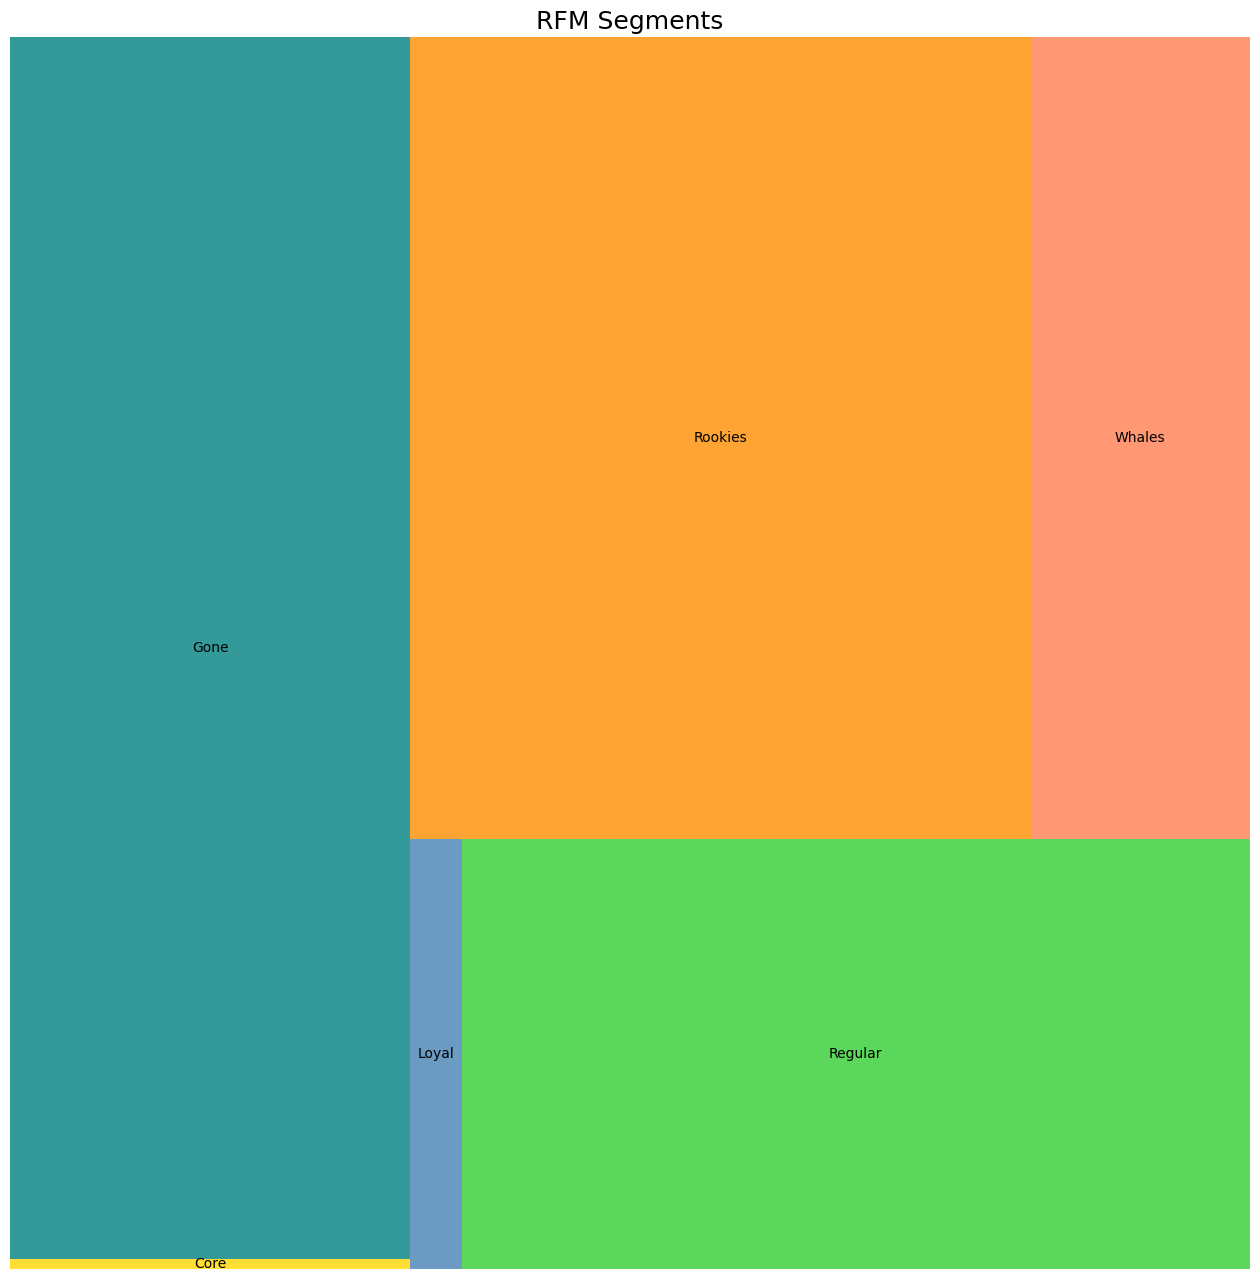

In [22]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18)
plt.axis('off')
plt.show()

In [ ]:
'''
Когортный анализ
'''

In [23]:
from operator import attrgetter

joined['order_purchase_timestamp'] = pd.to_datetime(joined['order_purchase_timestamp'])

joined['order_months'] = joined['order_purchase_timestamp'].dt.to_period('M')
joined['cohorts'] = joined.groupby('customer_id')['order_months'].transform('min')

cohorts_data = joined.reset_index().groupby(['cohorts', 'order_months']).agg(ClientsCount = ('customer_id', 'nunique'), 
                                                                             Revenue = ('payment_value', 'sum'), 
                                                                             Orders = ('order_id', 'count')).reset_index()

# периоды пребывания клиента
cohorts_data['periods'] = (cohorts_data.order_months - cohorts_data.cohorts).apply(attrgetter('n'))

cohorts_data.head()

,cohorts,order_months,ClientsCount,Revenue,Orders,periods
0,2016-09,2016-09,4,252.24,4,0
1,2016-10,2016-10,324,59090.48,342,0
2,2016-12,2016-12,1,19.62,1,0
3,2017-01,2017-01,800,138488.04,850,0
4,2017-02,2017-02,1780,291908.01,1886,0


In [ ]:
'''
Поскольку большинство наших клиентов не являются постоянными, мы не можем провести надлежащий когортный анализ 
по удержанию и другим возможным показателям.

К счастью, мы можем проанализировать динамику бизнеса и, возможно, даже сможем выявить некоторые относительно хорошие когорты, 
которые могут быть использованы в качестве прототипа (например, маркетологами).
'''

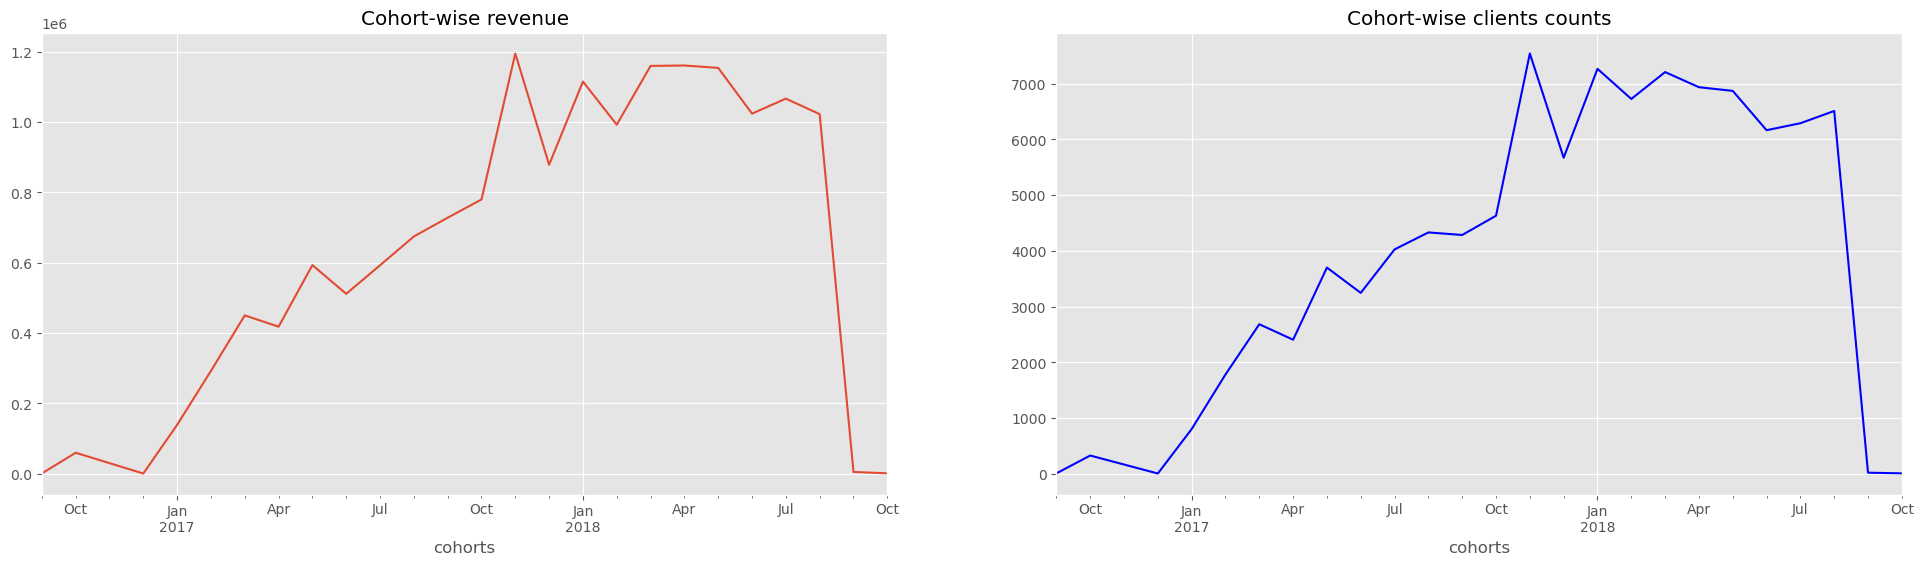

In [24]:
# для двух параллельных плотов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6)) 

cohorts_data.set_index('cohorts').Revenue.plot(ax=ax1)
ax1.set_title('Cohort-wise revenue')

cohorts_data.set_index('cohorts').ClientsCount.plot(ax=ax2, c='b')
ax2.set_title('Cohort-wise clients counts');

In [ ]:
'''
С левой стороны мы видим график дохода, а справа — график ClientsCount.

В целом, мы можем прийти к следующим выводам:

динамика двух графиков практически одинакова. 
Таким образом, похоже, что средняя сумма заказа была одинаковой почти для каждой когорты. 
Это может означать, что единственный способ получить больший доход — привлечь больше клиентов. 
Кроме того, мы знаем, что у нас 97% клиентов являются единоразовыми, поэтому, возможно, решение этой проблемы 
и стимулирование клиентов к возвращению также приведет к увеличению доходов.

Подозреваю, что у нас нет полных данных за последние несколько месяцев, потому что мы видим аномальное падение. 
Таким образом, эти последние месяцы не следует принимать во внимание.

Когорта ноября-2017 выглядит вне тренда, поскольку эта когорта показала выдающиеся результаты. 
Это может быть связано с распродажами «Черной пятницы», которые часто происходят в ноябре, а может быть, 
в ноябре 2017 года были проведены какие-то экспериментальные маркетинговые кампании, которые привели к хорошим результатам. 
Таким образом, данная когорта должна быть исследована компанией, чтобы выявить причину такого выдающегося результата 
и принять ее во внимание.
'''

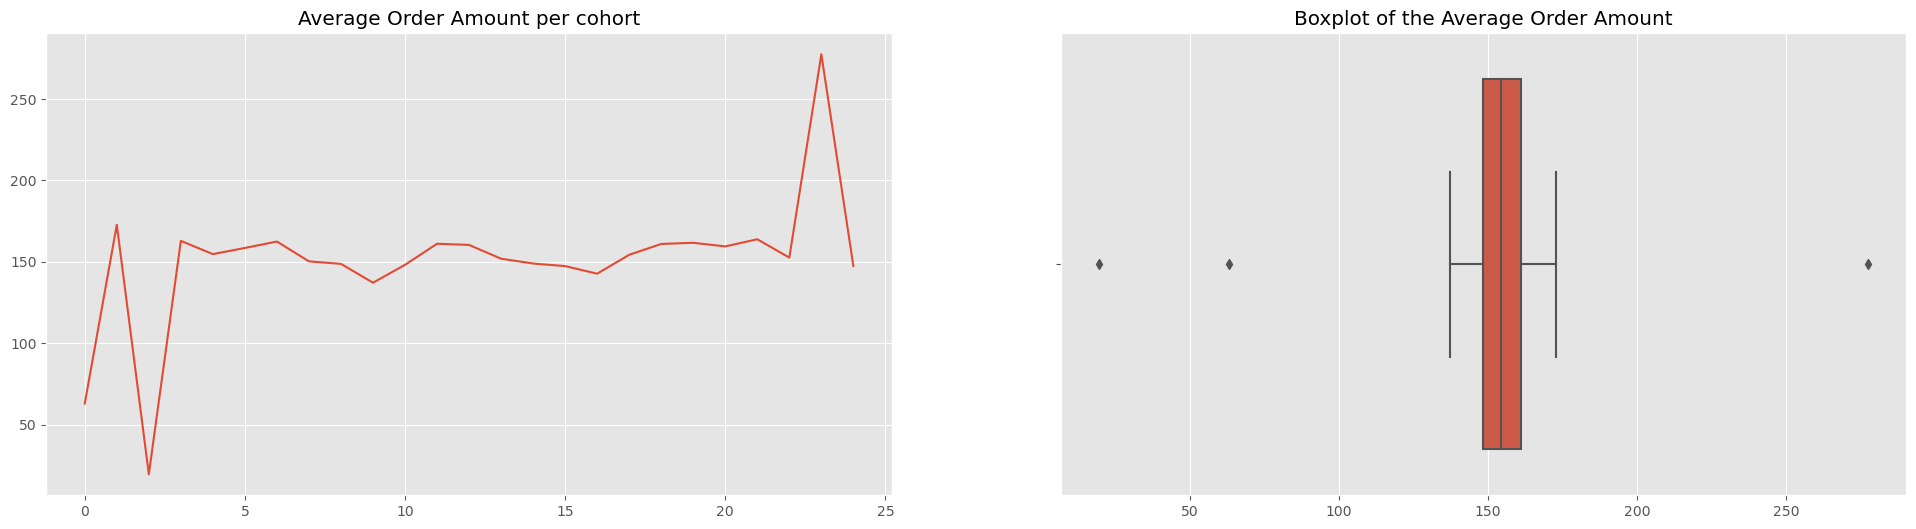

In [25]:
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))

(cohorts_data['Revenue']/cohorts_data['Orders']).plot(ax=ax1)
ax1.set_title('Average Order Amount per cohort')

sns.boxplot((cohorts_data['Revenue']/cohorts_data['Orders']), ax=ax2)
ax2.set_title('Boxplot of the Average Order Amount');

In [ ]:
'''
Как отмечалось выше, средний порядок практически для всех когор одинаков. 
Но у нас есть выбросы, расположенные в начале и конце левого графика. 
Эти выбросы, вероятно, следует игнорировать и можно предположить, что средняя сумма заказа одинакова для каждой когорты. 
Таким образом, это может означать, что компании следует работать над увеличением количества клиентов.
'''